In [89]:
# 데이터 불러오기
election <- read.csv("../Data/election_2022.csv")
library(dplyr)

In [131]:
election_loc <- aggregate(투표수 ~ 광역시도, election, sum)
election_loc$심상정 <- aggregate(심상정 ~ 광역시도, election, sum)[, 2] 
election_loc$윤석열 <- aggregate(윤석열 ~ 광역시도, election, sum)[, 2] 
election_loc$이재명 <- aggregate(이재명 ~ 광역시도, election, sum)[, 2] 
election_loc$심상정득표율 <- round(election_loc$심상정 / election_loc$ 투표수  * 100, 2)
election_loc$윤석열득표율 <- round(election_loc$윤석열 / election_loc$ 투표수  * 100, 2)
election_loc$이재명득표율 <- round(election_loc$이재명 / election_loc$ 투표수 * 100, 2)
election_loc$기타 <- round(100-(election_loc$심상정득표율+election_loc$윤석열득표율+election_loc$이재명득표율), 2)
election_loc$선거인구 <- aggregate(선거인수 ~광역시도, election, sum)[, 2]
election_loc$투표율 <- round(election_loc$투표수 / election_loc$선거인구 * 100 ,2)



In [132]:
election_loc

광역시도,투표수,심상정,윤석열,이재명,심상정득표율,윤석열득표율,이재명득표율,기타,선거인구,투표율
강원도,1015458,25031,544980,419644,2.46,53.67,41.33,2.54,1333621,76.14
경기도,8518854,201113,3859666,4297931,2.36,45.31,50.45,1.88,11106036,76.70
경상남도,2146882,52591,1237346,794130,2.45,57.63,36.99,2.93,2809907,76.40
경상북도,1774284,33123,1278922,418371,1.87,72.08,23.58,2.47,2273028,78.06
광주광역시,985492,14865,124511,830058,1.51,12.63,84.23,1.63,1209206,81.50
대구광역시,1611512,31131,1199888,345045,1.93,74.46,21.41,2.20,2046714,78.74
대전광역시,945308,25445,464060,434950,2.69,49.09,46.01,2.21,1233177,76.66
부산광역시,2200224,47541,1270072,831896,2.16,57.72,37.81,2.31,2921510,75.31
서울특별시,6501831,180324,3255747,2944981,2.77,50.07,45.29,1.87,8346647,77.90
세종특별자치시,231832,6780,101491,119349,2.92,43.78,51.48,1.82,288895,80.25


In [232]:
election_loc[election_loc$투표율==max(election_loc$투표율),]
election_loc[election_loc$투표율==min(election_loc$투표율),]

,광역시도,투표수,심상정,윤석열,이재명,심상정득표율,윤석열득표율,이재명득표율,기타,선거인구,투표율
5,광주광역시,985492,14865,124511,830058,1.51,12.63,84.23,1.63,1209206,81.5


,광역시도,투표수,심상정,윤석열,이재명,심상정득표율,윤석열득표율,이재명득표율,기타,선거인구,투표율
15,제주특별자치도,409649,13598,173014,213130,3.32,42.23,52.03,2.42,564354,72.59


In [233]:
a <- rbind(election_loc[election_loc$투표율==max(election_loc$투표율),],
election_loc[election_loc$투표율==min(election_loc$투표율),])

In [241]:
b <- a[, c(9, 6:8)]
b
rownames(b) <- paste(c('최저', '최고'),":", a$광역시도)
b <- as.matrix(b)
b <- t(b)


,기타,심상정득표율,윤석열득표율,이재명득표율
5,1.63,1.51,12.63,84.23
15,2.42,3.32,42.23,52.03


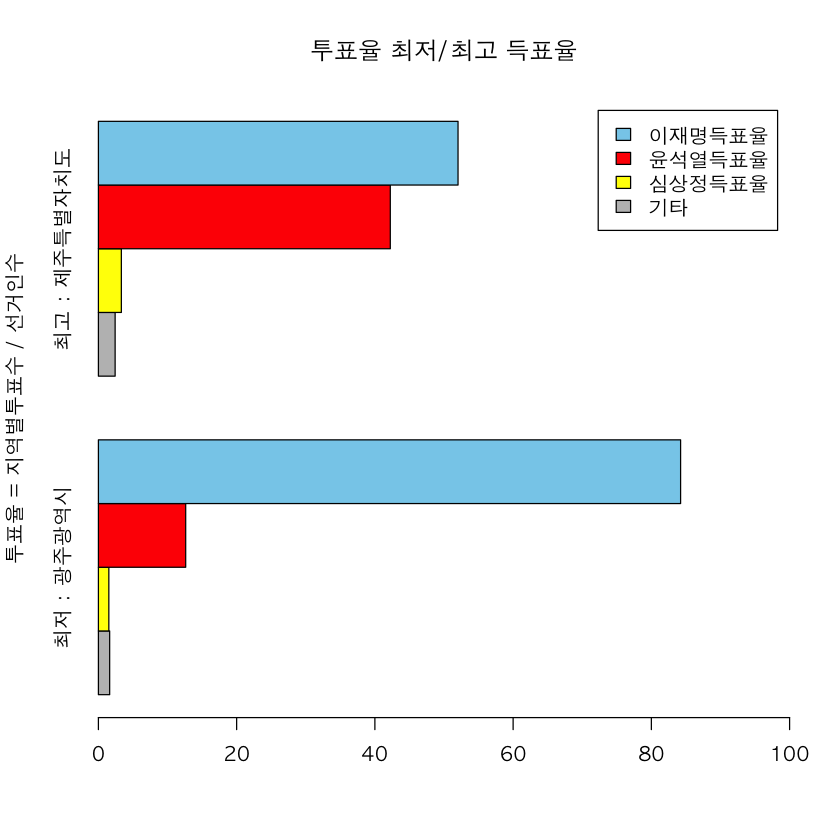

In [244]:
options(warn=-1)
par(family = "AppleGothic")

barplot(b,
        beside = T,
        horiz = T,
        legend.text = T,
        col = c("gray", "yellow", "red", "skyblue" ),
        main = "투표율 최저/최고 득표율",
        ylab = "투표율 = 지역별투표수 / 선거인수",
        xlim = c(0, 100)       
      )

In [245]:
election$이재명투표율 <- round(election$이재명/election$투표수 * 100, 2)
election$윤석열투표율 <- round(election$윤석열/election$투표수 * 100, 2)
election$투표율 <- round(election$투표수 / election$선거인수 * 100 ,2)

In [257]:
election$이재명50 <- ifelse(election$이재명투표율>=50&election$투표율>75, 1, 0)
election$윤석열50 <- ifelse(election$윤석열투표율>50&election$투표율>75, 1, 0)
election$투표율75 <- ifelse(election$투표율>=75, 1, 0)

In [262]:
x1 <- merge(merge(aggregate(이재명50 ~ 광역시도, election, sum), aggregate(윤석열50 ~ 광역시도, election, sum)), 
aggregate(투표율75 ~ 광역시도, election, sum))

-----
# 권역별 후보 득표율

In [502]:
# 데이터 불러오기
head(election)
election$심상정투표율 <- round(election$심상정/election$투표수 * 100, 2)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,투표율,이재명투표율,윤석열투표율,이재명50,윤석열50,투표율75,심상정투표율
서울특별시,종로구,129968,100629,46130,49172,3115,77.43,45.84,48.86,0,0,1,3.10
서울특별시,중구,111448,84998,38244,42906,2310,76.27,44.99,50.48,0,1,1,2.72
서울특별시,용산구,199077,152068,60063,85047,4374,76.39,39.50,55.93,0,1,1,2.88
서울특별시,성동구,252087,197240,84411,103880,5365,78.24,42.80,52.67,0,1,1,2.72
서울특별시,광진구,303582,235471,109922,113733,7072,77.56,46.68,48.30,0,0,1,3.00
서울특별시,동대문구,300928,232106,108171,112890,6416,77.13,46.60,48.64,0,0,1,2.76


In [503]:
z1 <- merge(merge(aggregate(이재명투표율 ~ 광역시도, election, mean), 
            aggregate(윤석열투표율 ~ 광역시도, election, mean)), 
      aggregate(심상정투표율 ~ 광역시도, election, mean))

In [504]:
강원권 <- c("강원도")
수도권 <- c("경기도","서울특별시","인천광역시")
영남권 <- c("경상북도","경상남도","부산광역시","대구광역시","울산광역시")
호남권 <- c("광주광역시","대전광역시","전라남도","전라북도")
충청권 <- c("세종특별자치시","충청남도","충청북도")

In [505]:
z1$지역 <- ifelse(z1$광역시도 %in% 수도권, '수도권', 
      ifelse(z1$광역시도 %in% 영남권, '영남권', 
            ifelse(z1$광역시도 %in% 호남권, '호남권', 
                  ifelse(z1$광역시도 %in% 충청권, '충청권', '강원도' ))))

In [506]:
z1 <- merge(merge(aggregate(이재명투표율 ~지역, z1, mean) ,
            aggregate(윤석열투표율 ~지역, z1, mean)), 
      aggregate(심상정투표율 ~지역, z1, mean))

In [507]:
z1 <- t(z1)
z1

지역,강원도,수도권,영남권,충청권,호남권
이재명투표율,45.50861,46.94965,31.05516,45.52377,74.63695
윤석열투표율,49.09056,48.40853,64.13674,49.62063,21.65690
심상정투표율,2.785556,2.580875,2.187662,2.546298,1.701970


In [497]:
par(family = "AppleGothic")
options(warn =  -1)


In [512]:
z1[1,]

[1] "강원도" "수도권" "영남권" "충청권" "호남권"

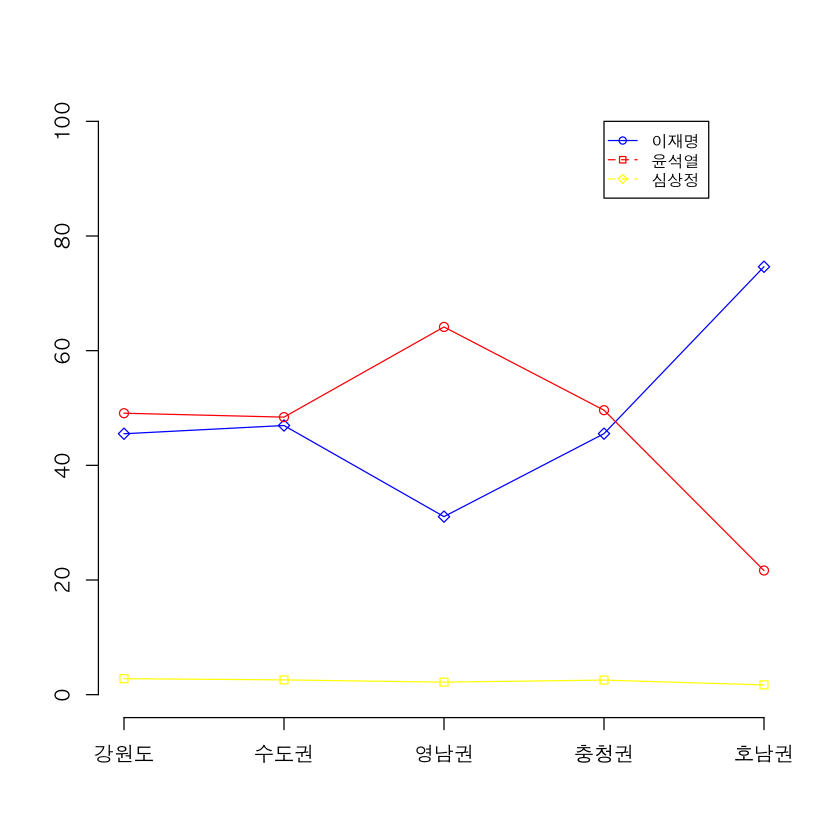

In [514]:
par(family = "AppleGothic")
plot(z1[2, ],
     type ="o",
     col = "blue",
     ylim = c(0, 100),
     axes = F, # x,y 좌표 Frame 제거,
     ann = F, # x,y의 label 제거
     pch = 23
    )

lines(z1[3,],
      type = 'o',
      col = 'red',
      pch = 21
     )
lines(z1[4,],
      type = 'o',
      col = 'yellow',
      pch = 22
     )

# x축과 x축의 라벨을 설정
axis(1, at=1:5, lab=c(z3$지역))

# y축과 y축의 라벨을 설정
axis(2, ylim=c(0,100))

legend(4, 100,   # x, y 좌료
      c("이재명", "윤석열", "심상정"),
      col = c("blue", "red", "yellow"),
      pch = c(21,22,23),
      lty = c(1,2,2),
      cex = 0.8
      
      )